<a href="https://colab.research.google.com/github/Harshvardhan-1-1/Machine-Learning-Projects/blob/main/car_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder

In [24]:
data = pd.read_csv('car data.csv')

In [25]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
128,Honda CB Hornet 160R,2017,0.80,0.87,3000,Petrol,Individual,Manual,0
185,Suzuki Access 125,2008,0.25,0.58,1900,Petrol,Individual,Automatic,0
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0
216,eon,2016,2.90,4.43,12500,Petrol,Dealer,Manual,0
282,city,2014,8.25,14.00,63000,Diesel,Dealer,Manual,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [28]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [29]:
encoder = OrdinalEncoder(categories = [
    ['Petrol' , 'Diesel' , 'CNG'],
    ['Seller' , 'Dealer' , 'Individual'],
    ['Manual' , 'Automatic']
])
cols = ['Fuel_Type' , 'Seller_Type' , 'Transmission']
data[cols] = encoder.fit_transform(data[cols])

In [30]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
169,Hero Splender iSmart,2015,0.40,0.54,14000,0.0,2.0,0.0,0
0,ritz,2014,3.35,5.59,27000,0.0,1.0,0.0,0
258,city,2015,8.40,13.60,25000,0.0,1.0,0.0,0
268,brio,2017,4.80,5.80,19000,0.0,1.0,0.0,0
203,i10,2011,2.95,4.60,53460,0.0,1.0,0.0,0


In [31]:
x = data.drop(['Car_Name' ,'Selling_Price'],axis =1 )
y = data['Selling_Price']

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .30 , random_state = 24)

In [33]:
lr = LinearRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)

In [35]:
accuracy = r2_score(y_pred , y_test)

In [36]:
accuracy

0.7854635259769653

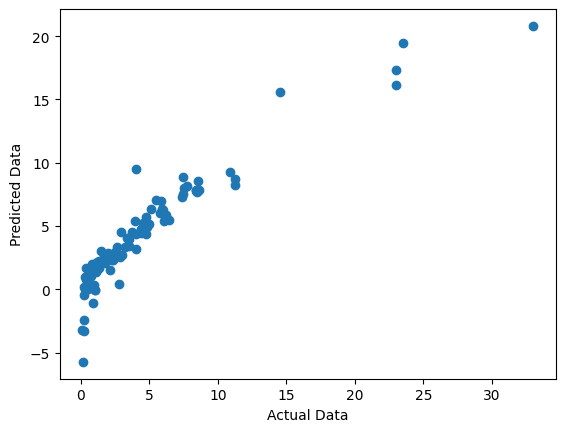

In [39]:
plt.scatter(y_test , y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [41]:
# now by lasso
las = Lasso()
las.fit(x_train , y_train)
y_pred2 = las.predict(x_test)

In [42]:
accu = r2_score(y_pred2 , y_test)

In [43]:
accu

0.6542933033034171

Text(0, 0.5, 'Predicted Data')

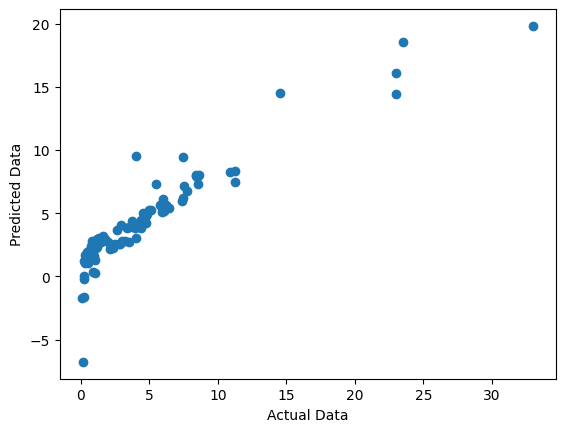

In [46]:
plt.scatter(y_test, y_pred2)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')